# ELG Density around Gaia Stars

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import modules as ms

## North (old mask radius)

In [2]:
lrad = ms.LRGRad()
erad = ms.ELGRad()

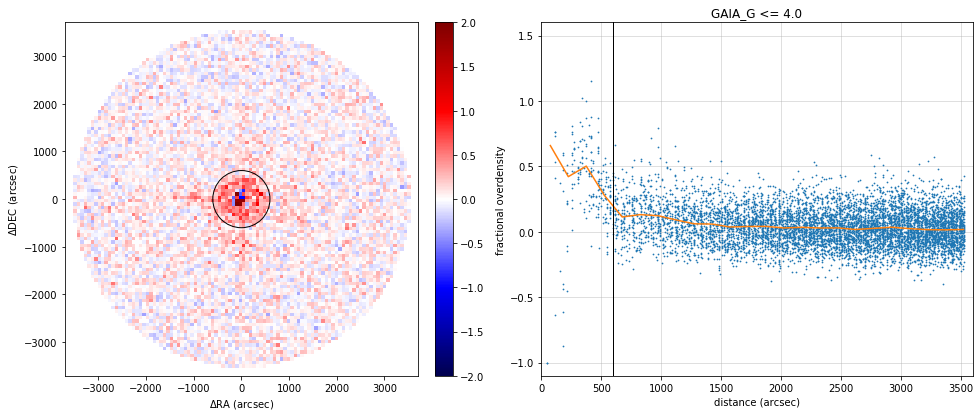

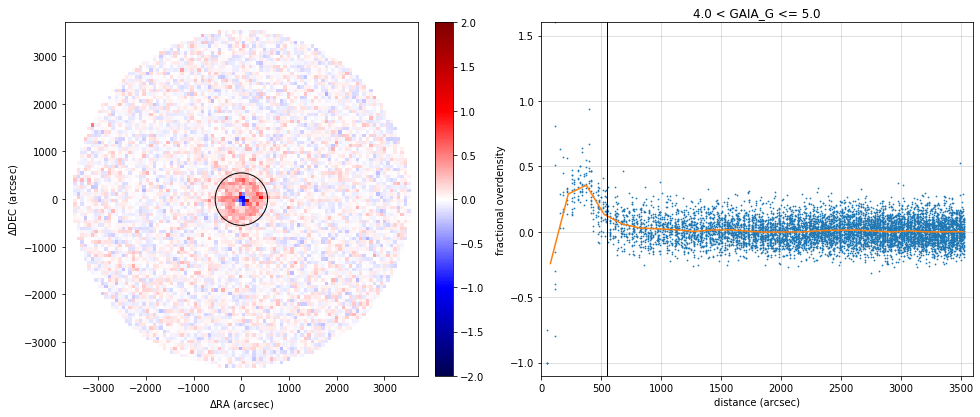

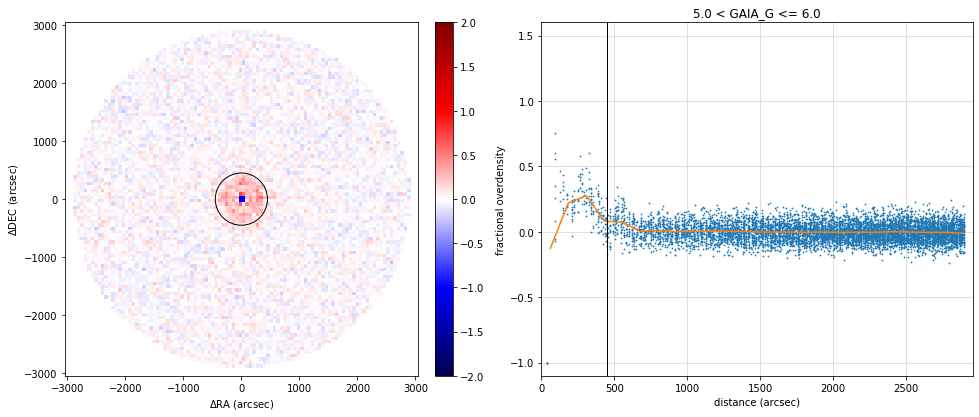

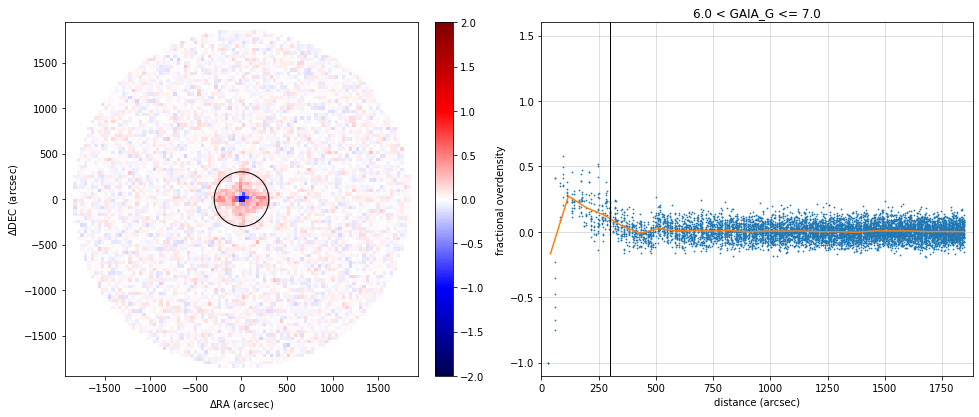

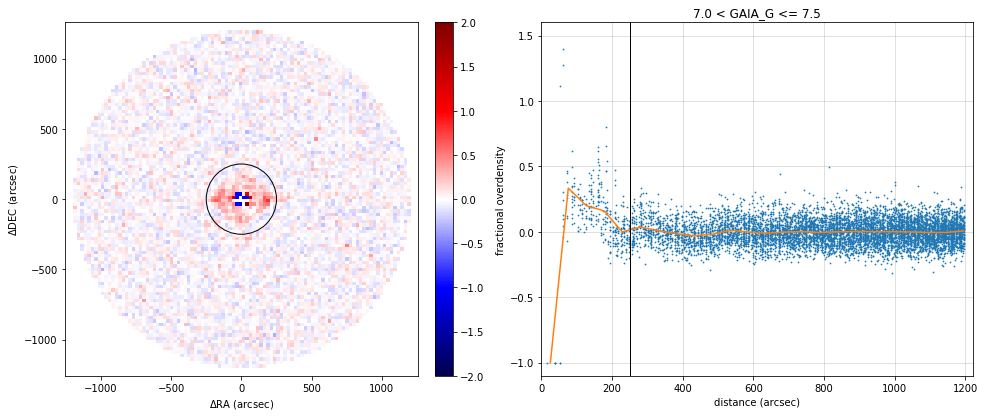

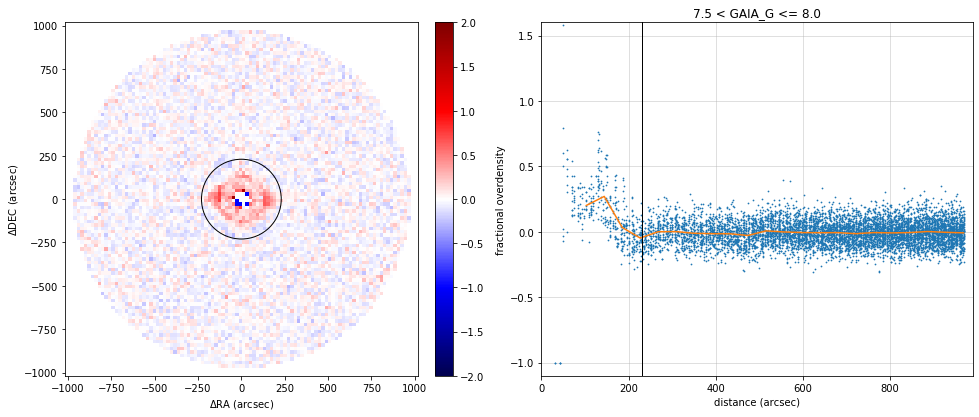

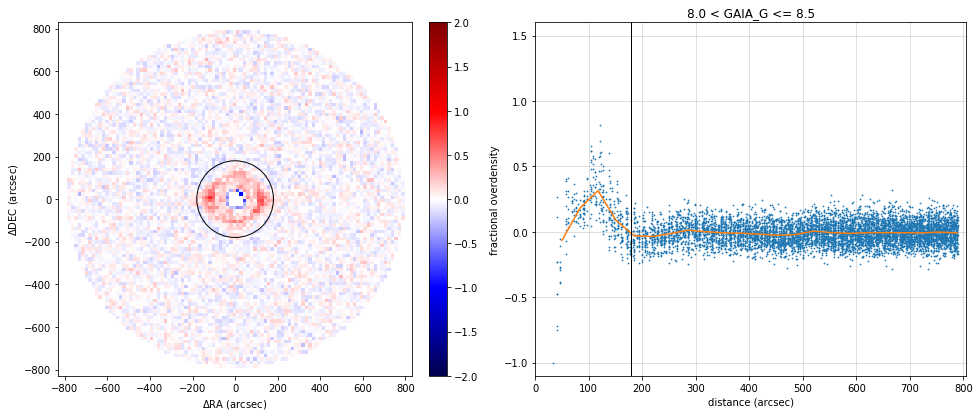

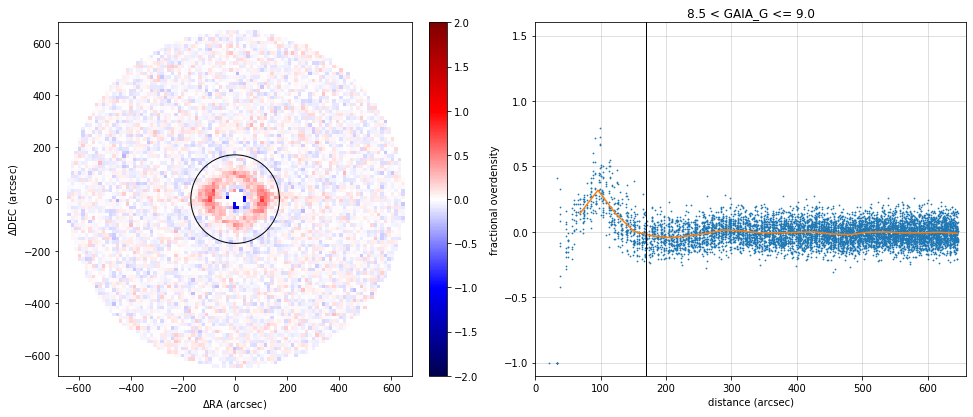

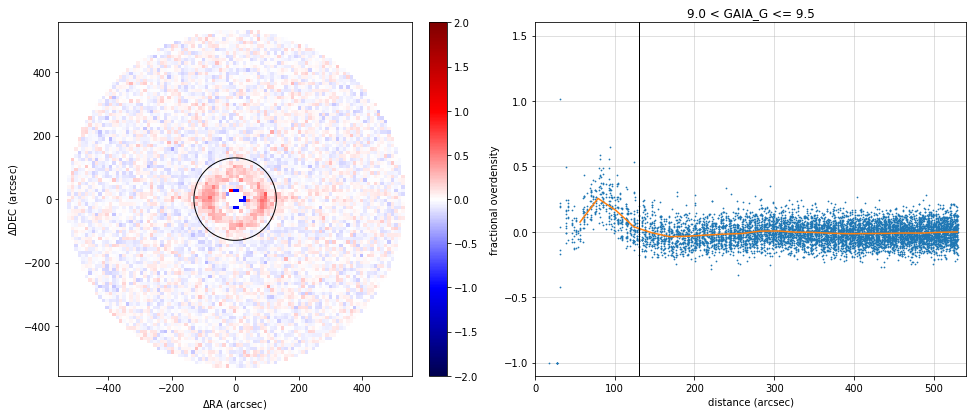

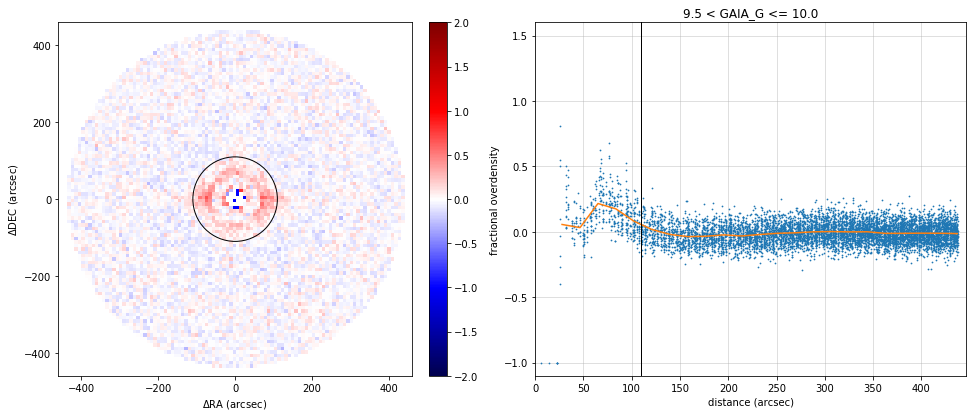

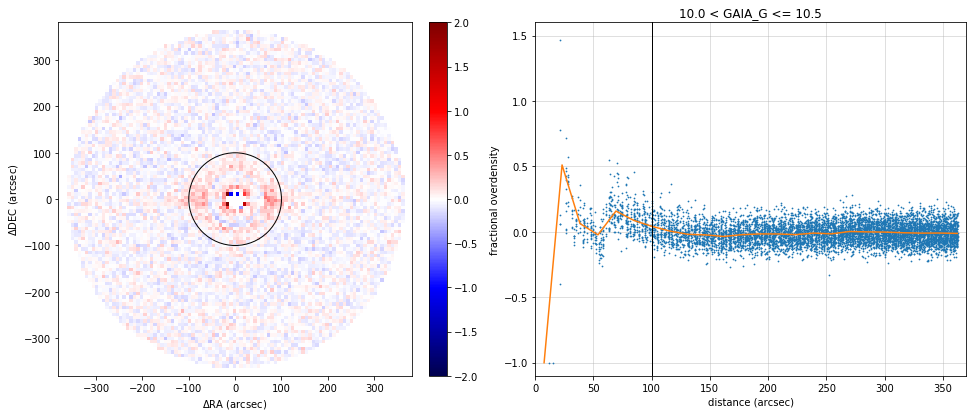

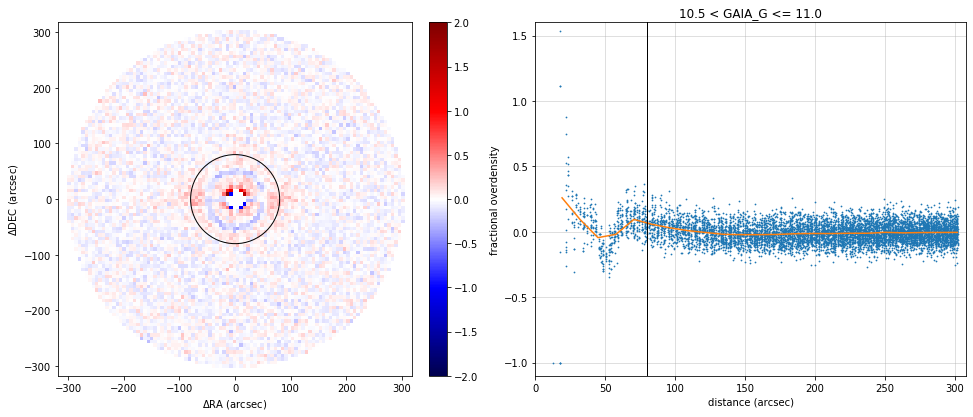

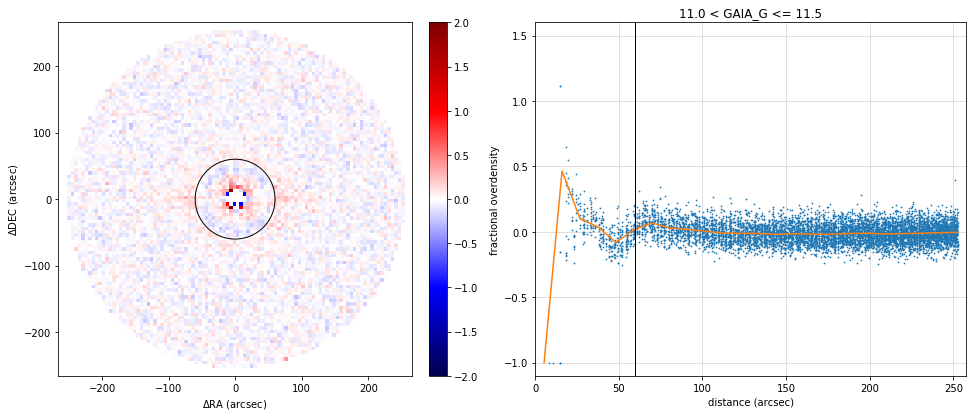

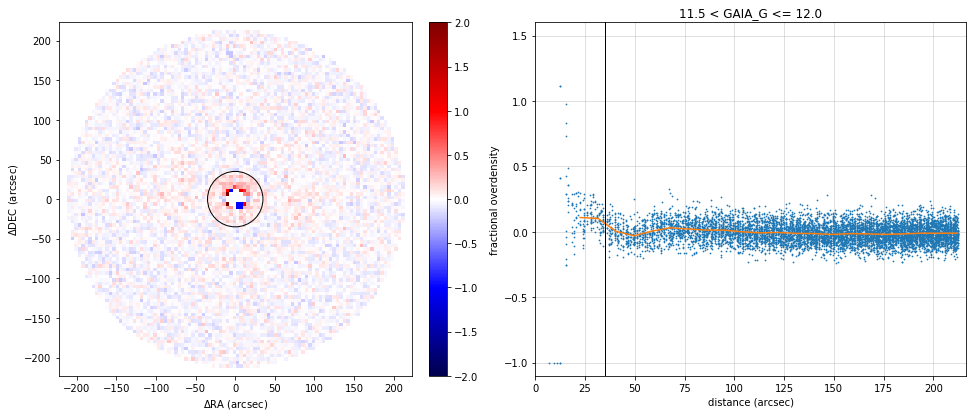

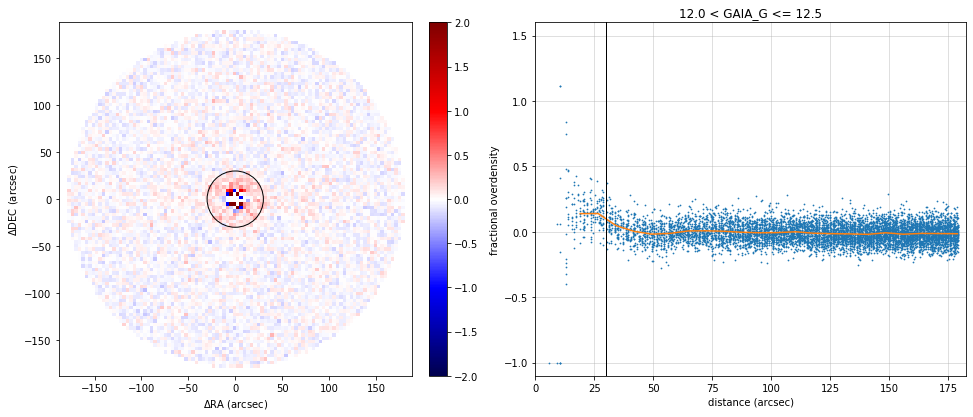

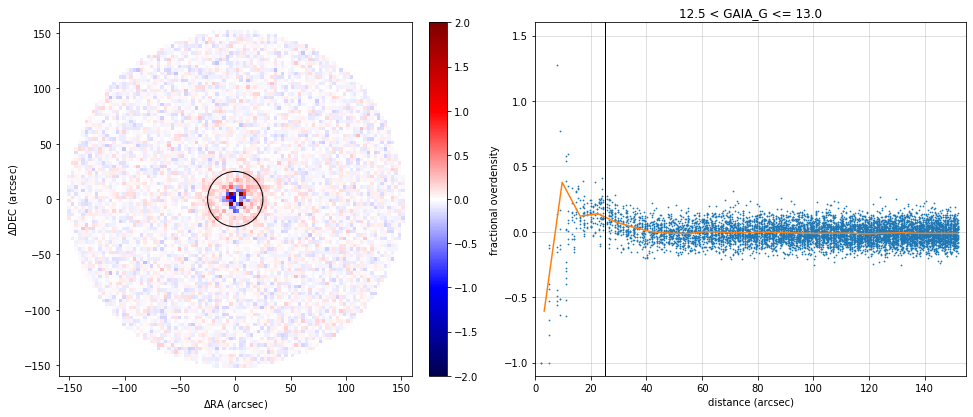

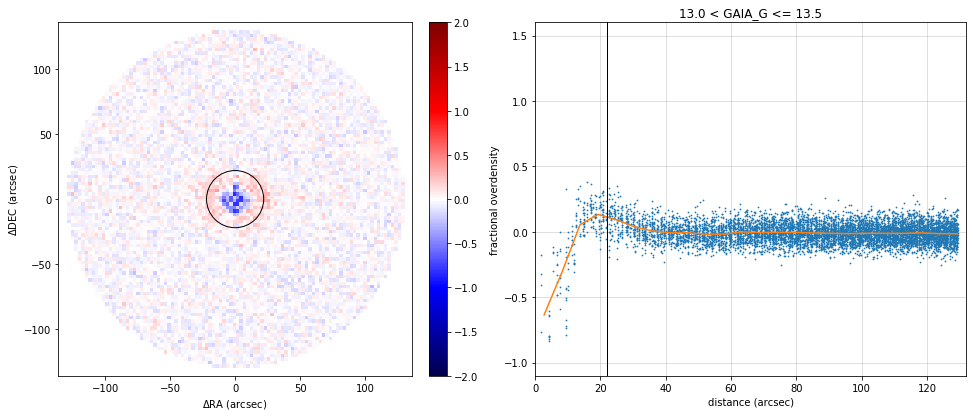

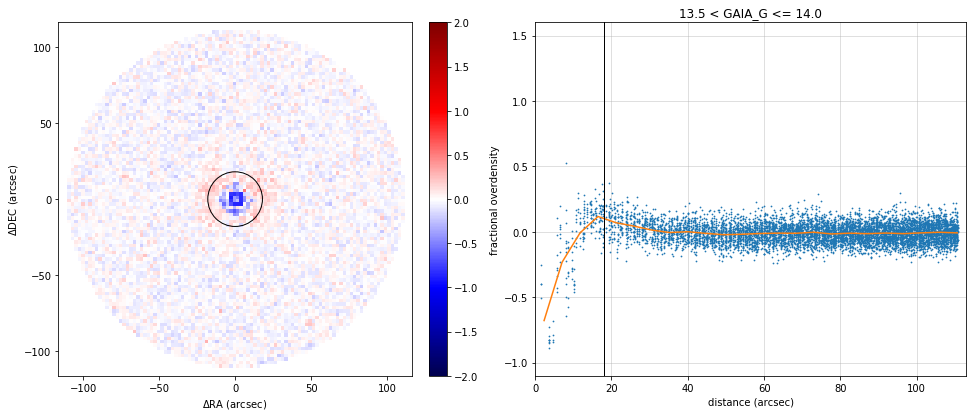

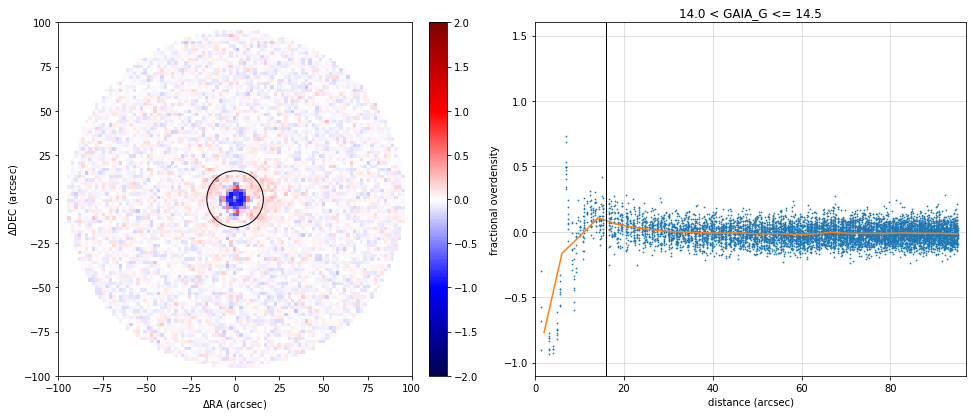

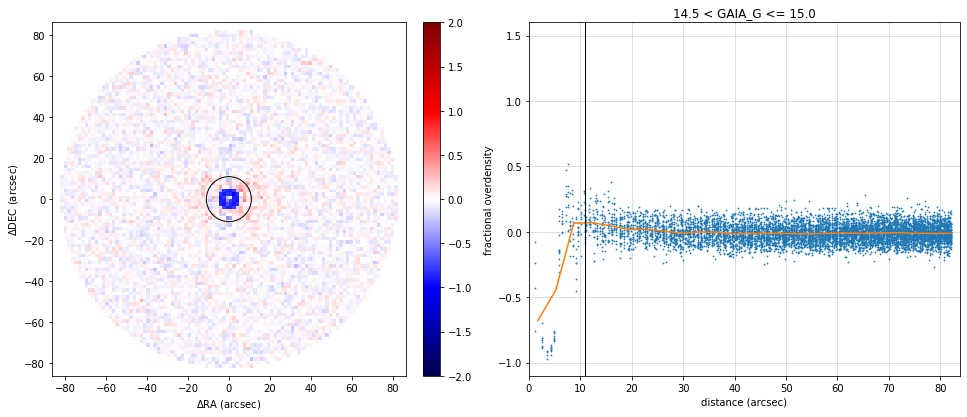

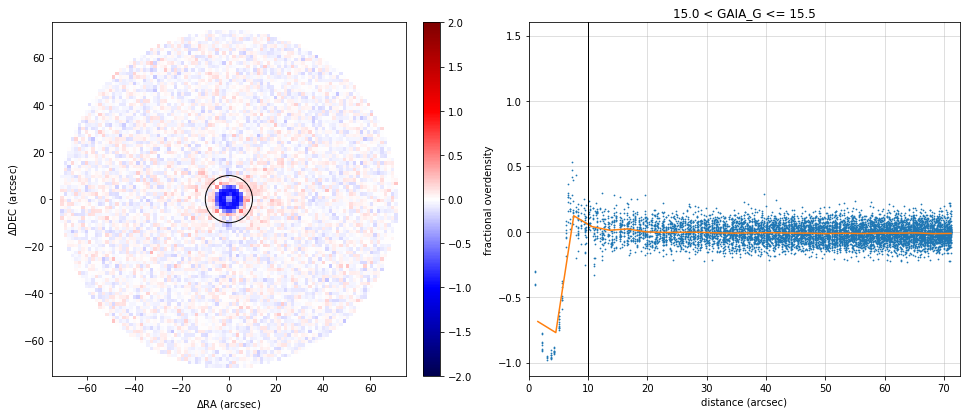

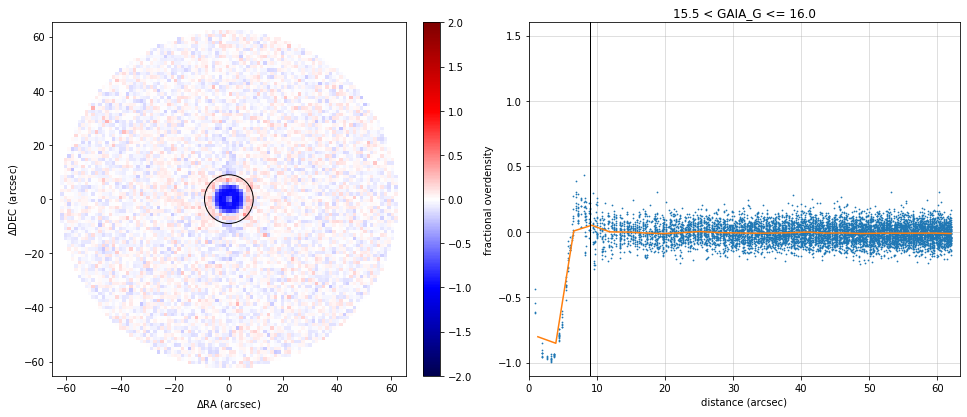

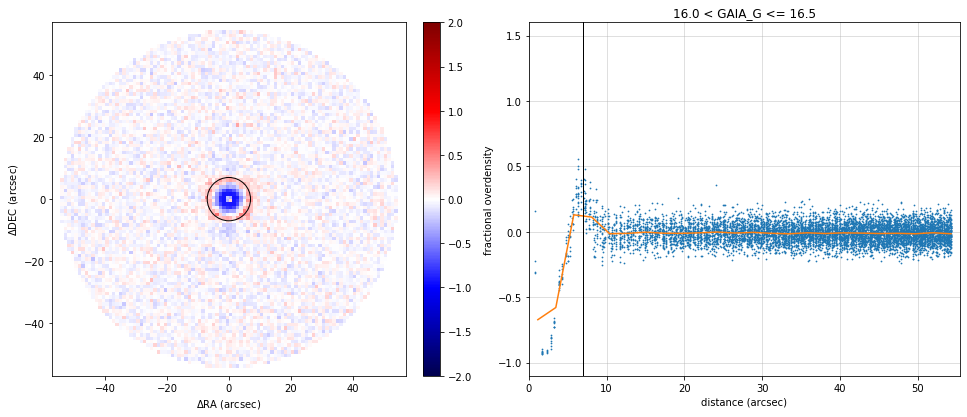

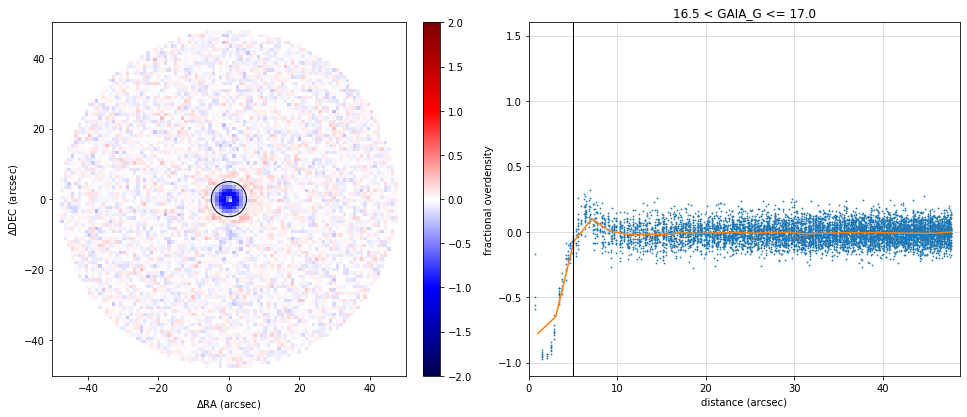

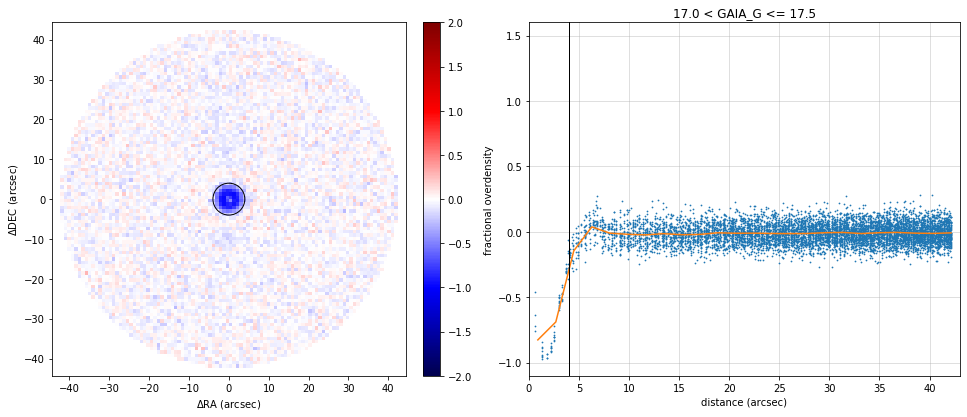

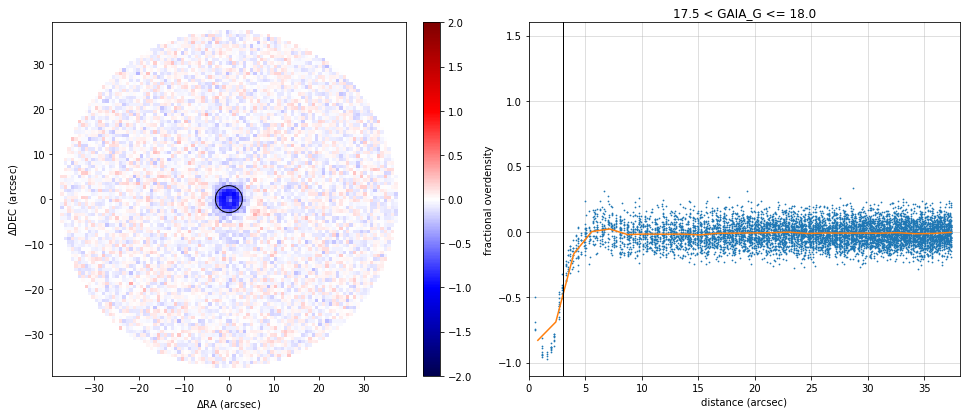

In [3]:
gaia_mag_list = np.array([-np.inf, 4., 5., 6., 7.] + np.arange(7.5, 18.5, 0.5).tolist())

for i in range(0, len(gaia_mag_list)-1):
    fl = np.load(f'dens_elg_gaia_gmag_{i}_north.npz', allow_pickle=True)
    
    gaia_min, gaia_max = gaia_mag_list[i:i+2]
    if gaia_min==-np.inf:
        title = 'GAIA_G <= {:.1f}'.format(gaia_max)
    else:
        title = '{:.1f} < GAIA_G <= {:.1f}'.format(gaia_min, gaia_max)
        
    
    ax, _ = ms.relative_density_subplots_fast(fl['bins'], fl['reldens'], 
                        vmin=-2, vmax=2,
                          xlabel1='$\Delta$RA (arcsec)', ylabel1='$\Delta$DEC (arcsec)',
                          xlabel2='distance (arcsec)', ylabel2='fractional overdensity')
    ax[1].set_title(title)
    
    
    circle = plt.Circle(( 0.0 , 0.0 ), erad.f_radius_north(gaia_max), fill=False, color='k')
    ax[0].add_artist(circle)
    ax[1].axvline(erad.f_radius_north(gaia_max), ls='-', lw=1, color='k')
    
    plt.show()

## South (old mask radius)

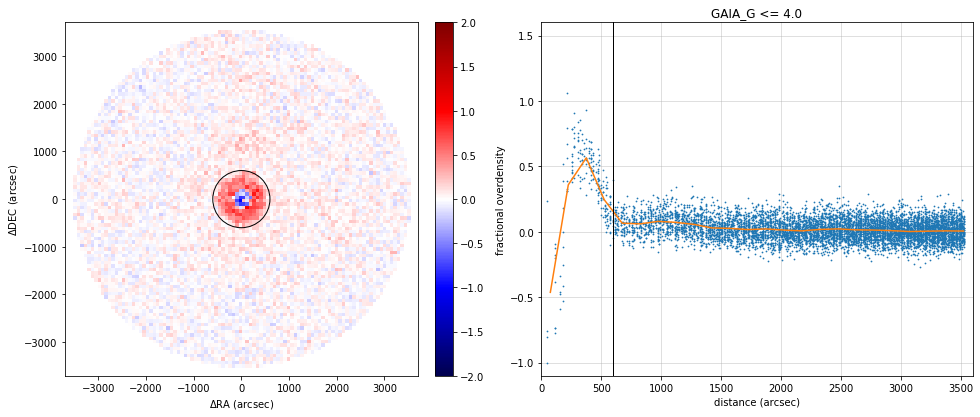

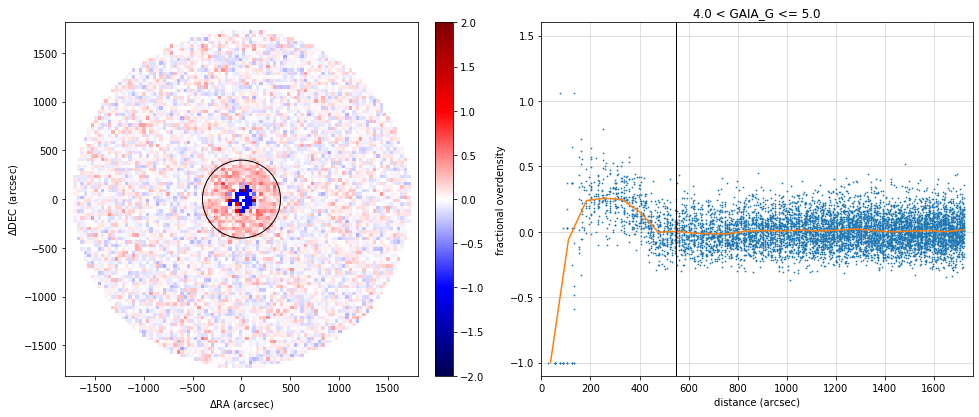

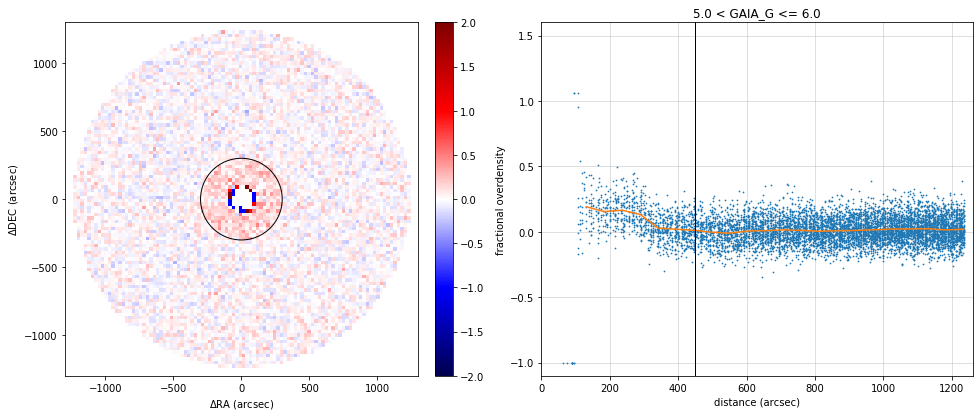

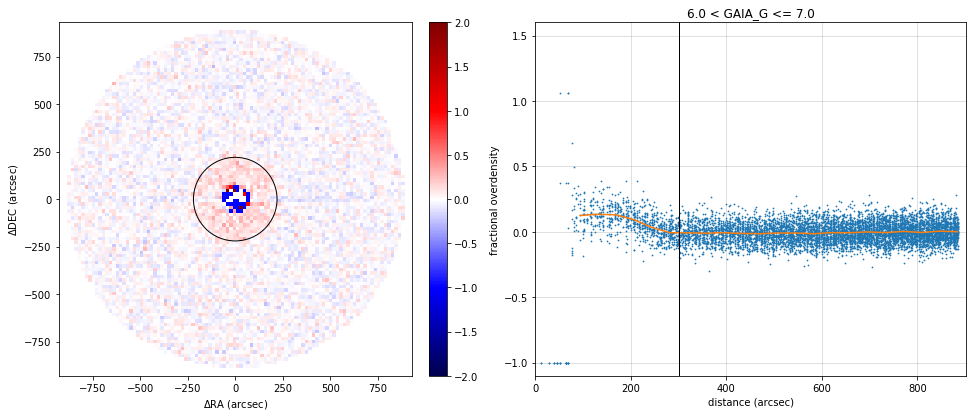

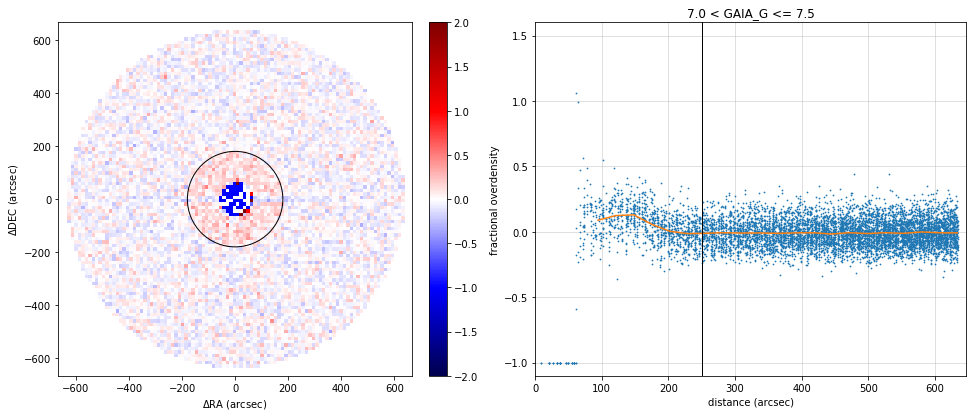

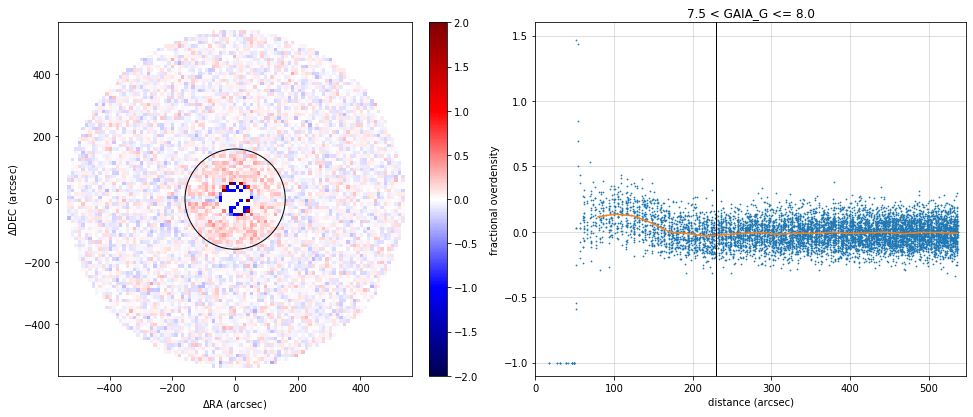

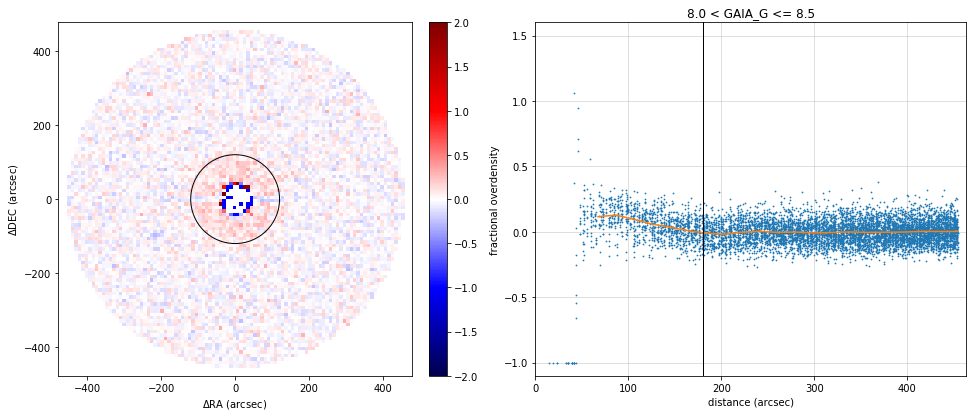

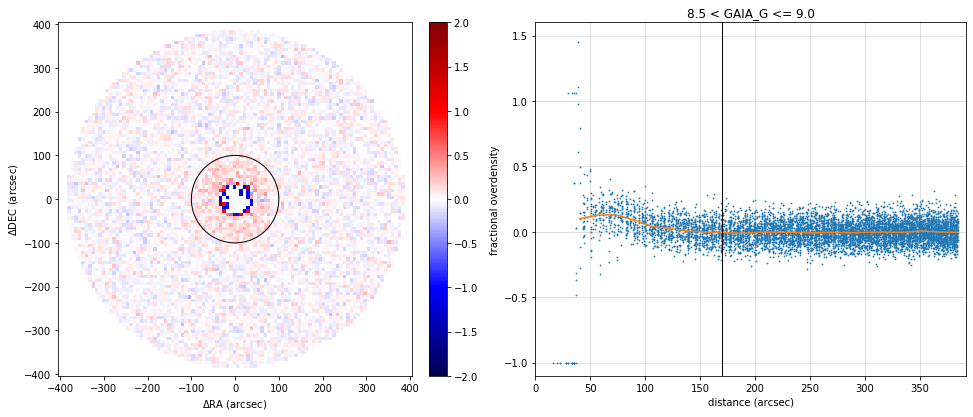

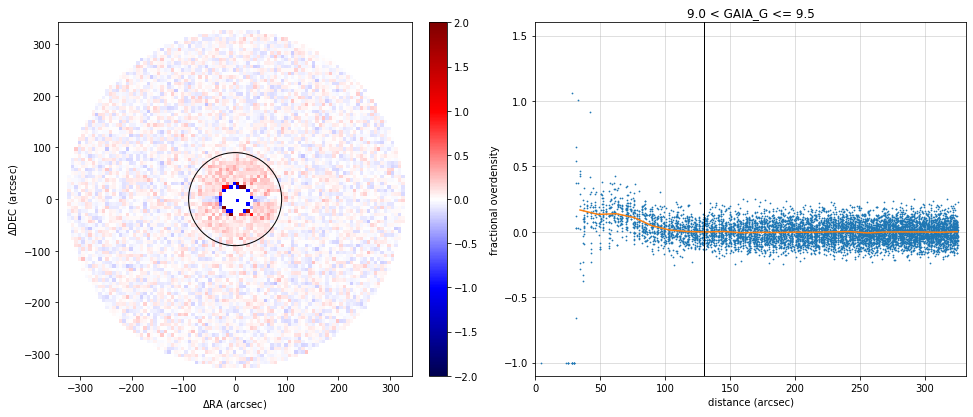

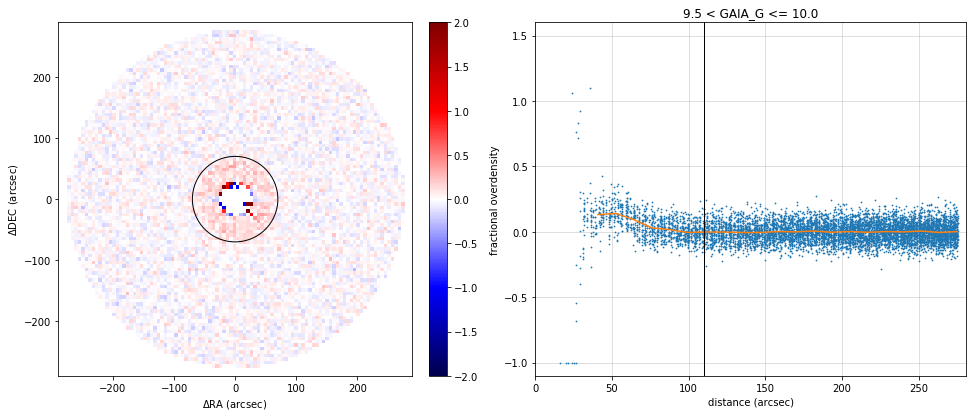

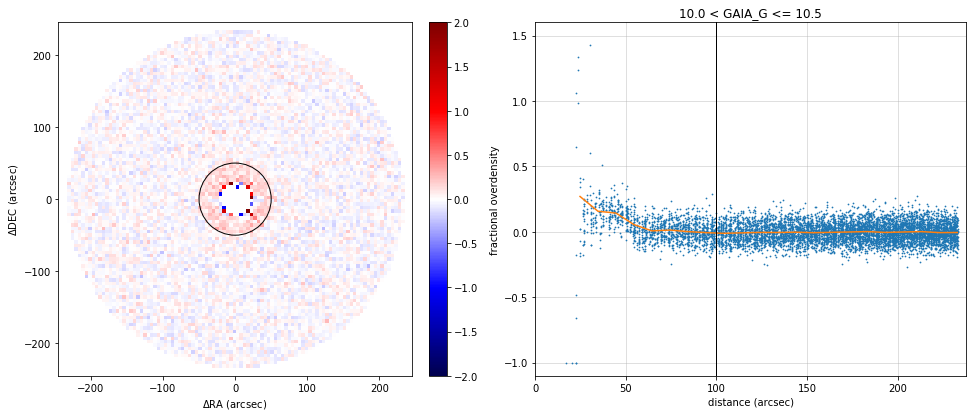

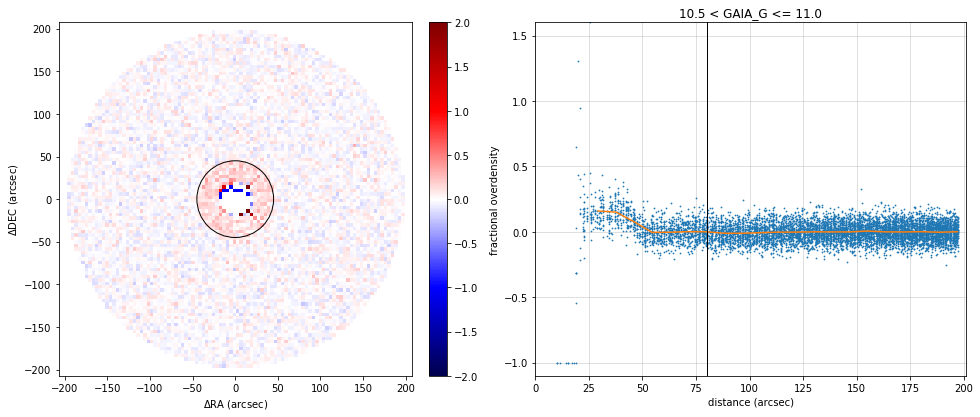

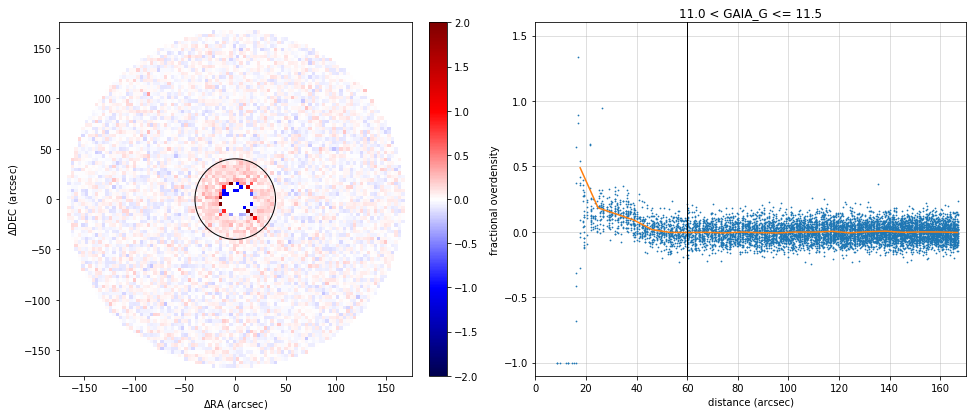

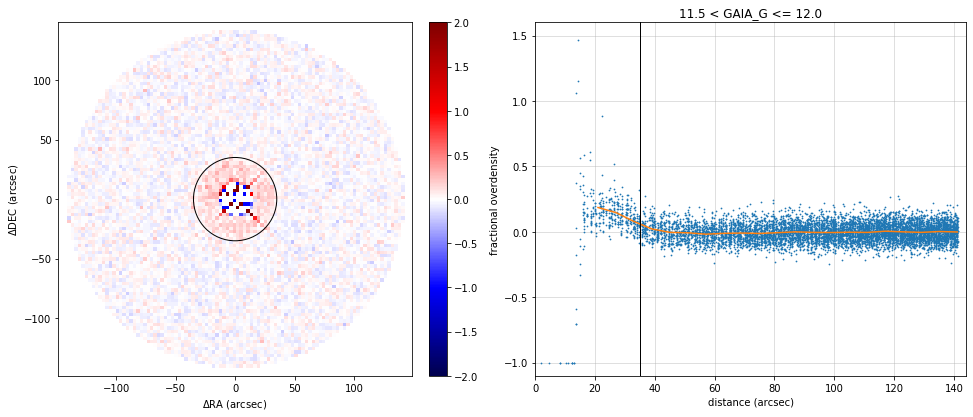

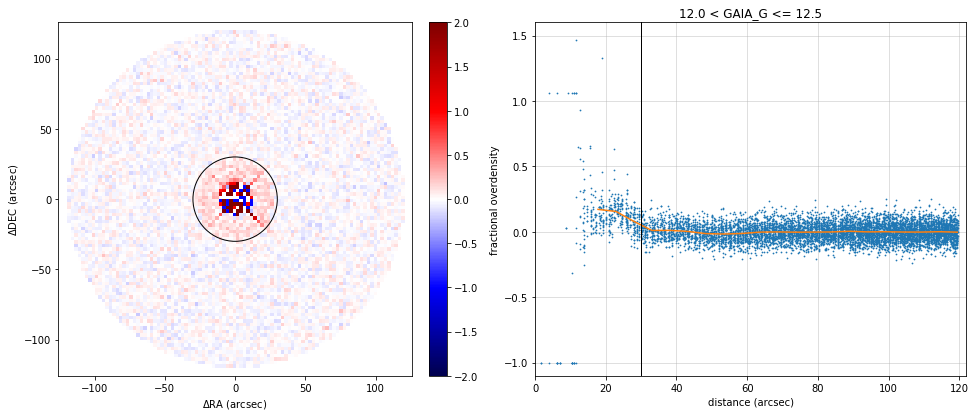

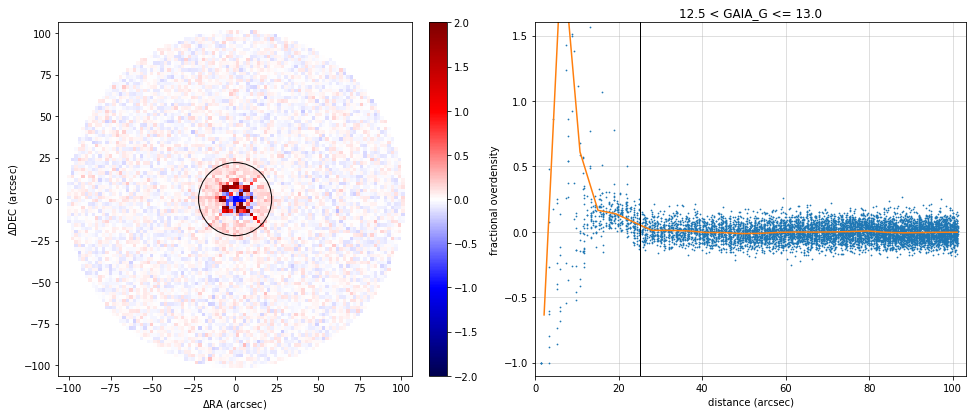

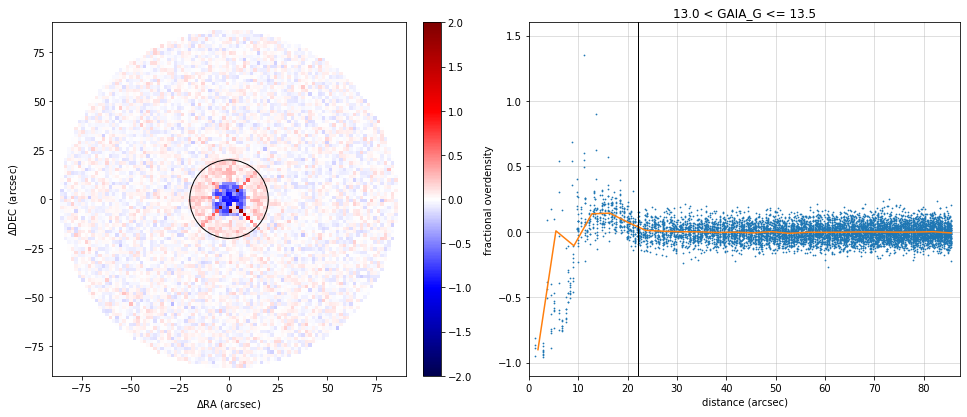

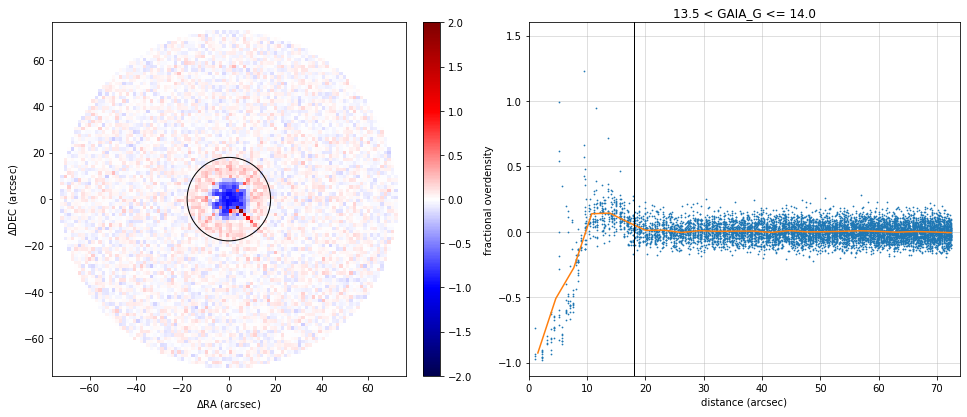

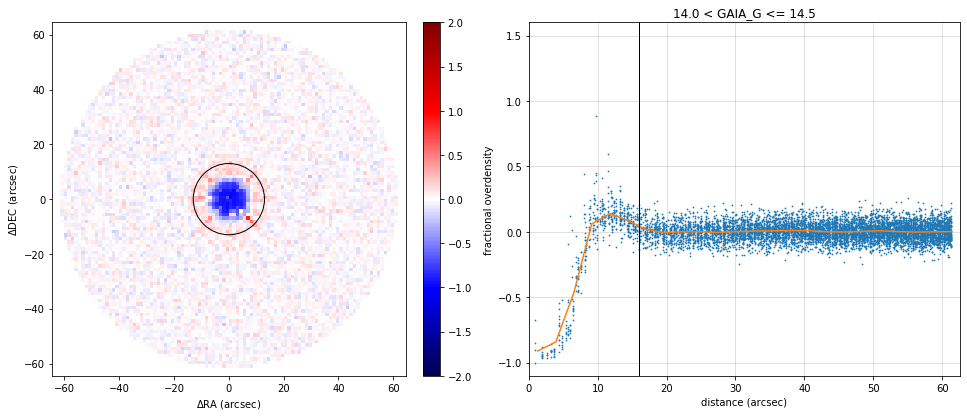

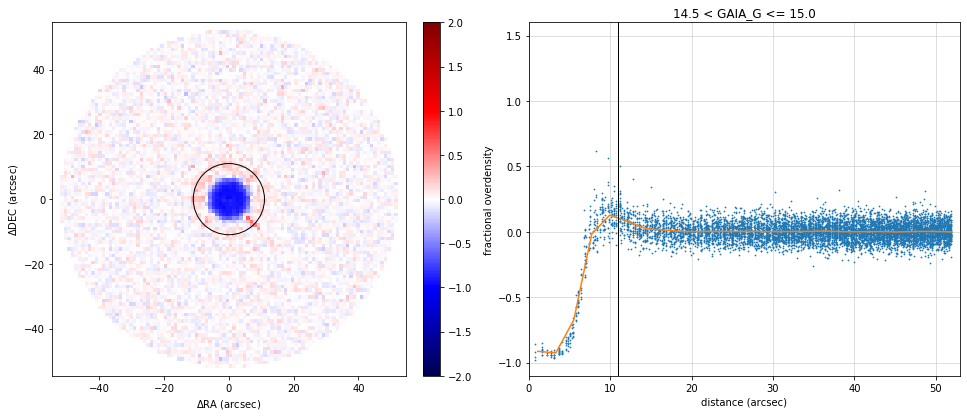

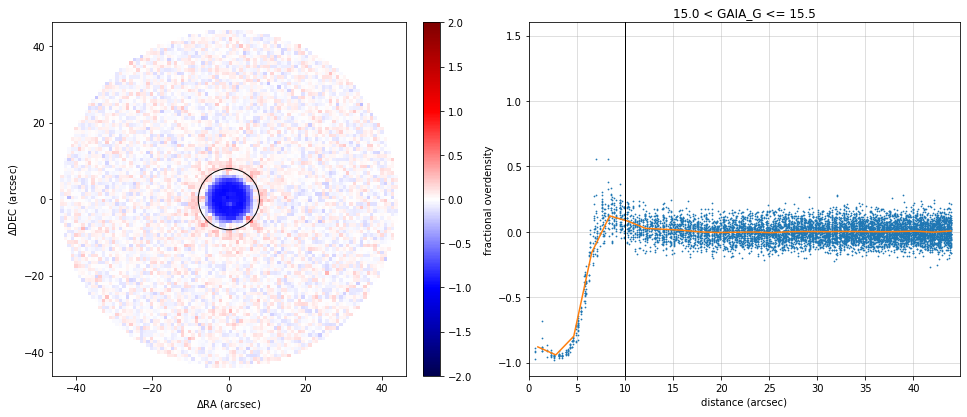

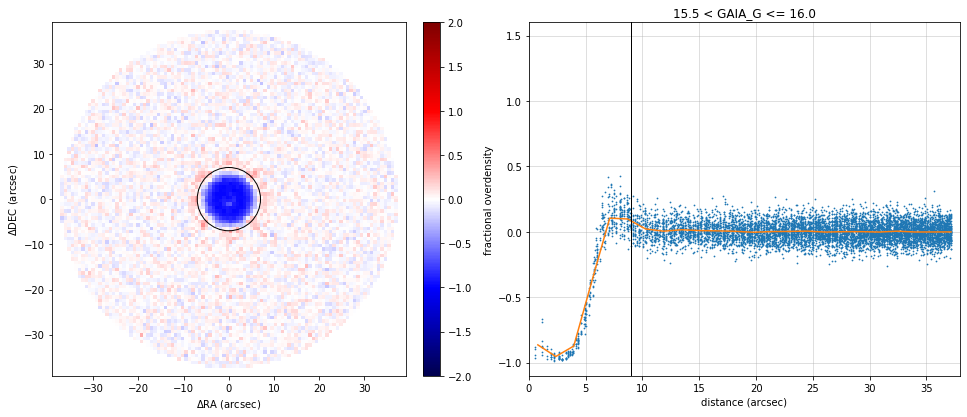

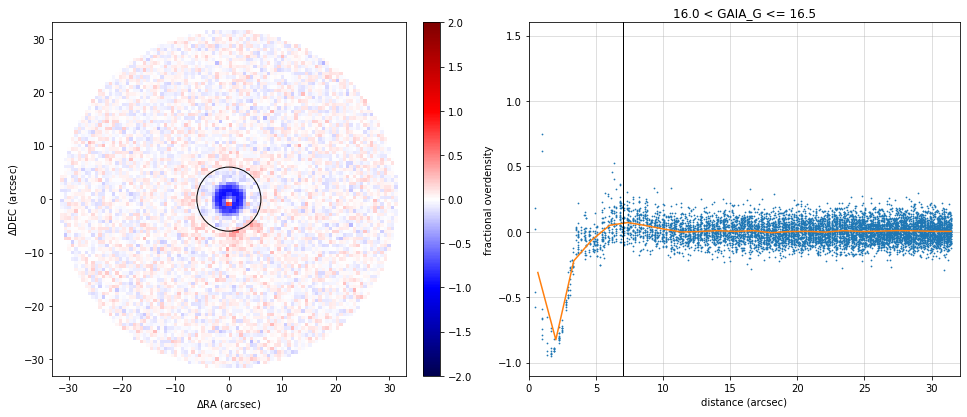

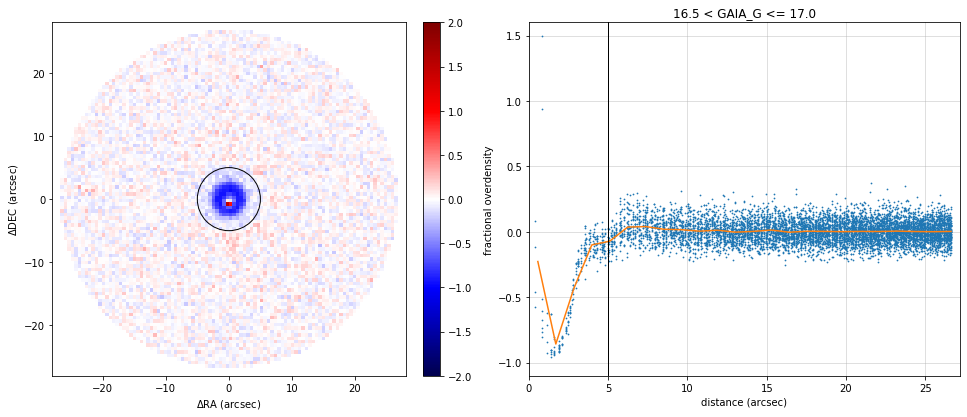

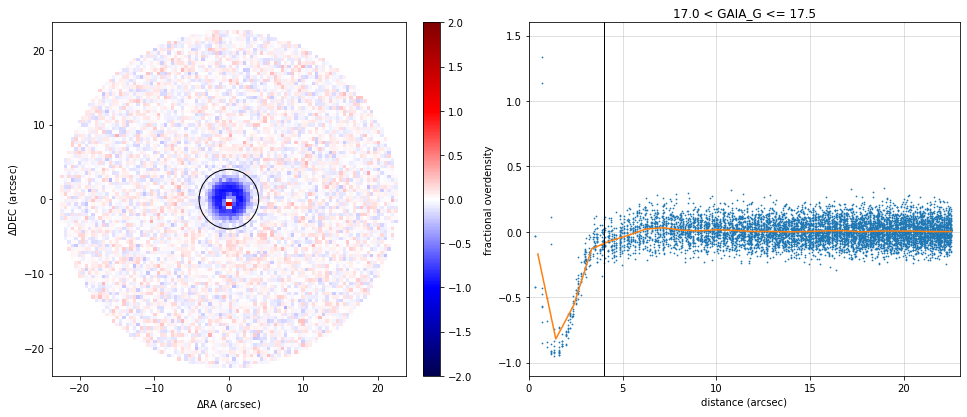

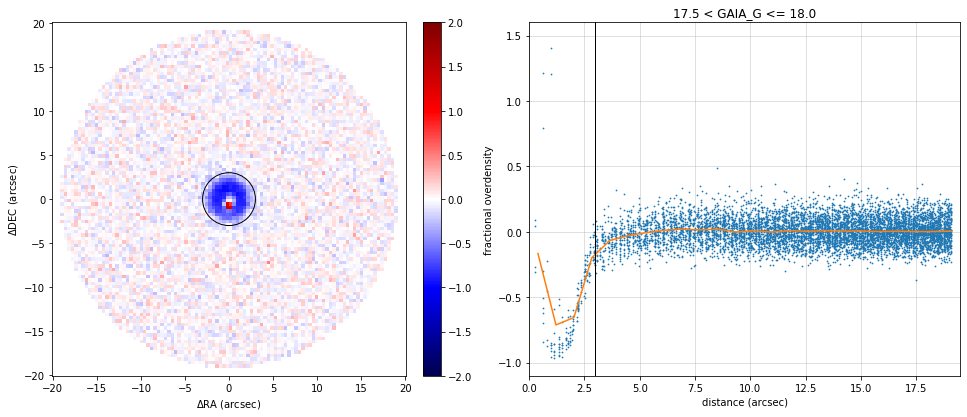

In [4]:
gaia_mag_list = np.array([-np.inf, 4., 5., 6., 7.] + np.arange(7.5, 18.5, 0.5).tolist())

for i in range(0, len(gaia_mag_list)-1):
    fl = np.load(f'dens_elg_gaia_gmag_{i}.npz', allow_pickle=True)
    
    gaia_min, gaia_max = gaia_mag_list[i:i+2]
    if gaia_min==-np.inf:
        title = 'GAIA_G <= {:.1f}'.format(gaia_max)
    else:
        title = '{:.1f} < GAIA_G <= {:.1f}'.format(gaia_min, gaia_max)
        
    
    ax, _ = ms.relative_density_subplots_fast(fl['bins'], fl['reldens'], 
                        vmin=-2, vmax=2,
                          xlabel1='$\Delta$RA (arcsec)', ylabel1='$\Delta$DEC (arcsec)',
                          xlabel2='distance (arcsec)', ylabel2='fractional overdensity')
    ax[1].set_title(title)
    
    circle = plt.Circle(( 0.0 , 0.0 ), erad.f_radius_south(gaia_max), fill=False, color='k')
    ax[0].add_artist(circle)
    ax[1].axvline(erad.f_radius_north(gaia_max), ls='-', lw=1, color='k')
        
    plt.show()

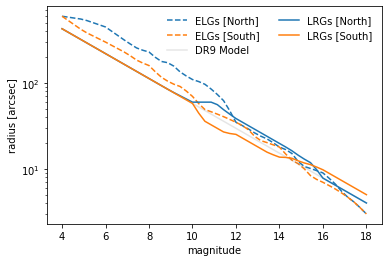

In [5]:
fg, ax = plt.subplots()


mag = np.linspace(4., 18.)

ax.plot(mag, erad.f_radius_north(mag), 'C0--', label='ELGs [North]')
ax.plot(mag, erad.f_radius_south(mag), 'C1--', label='ELGs [South]')
ax.plot(mag, ms.mag2r_old(mag), ls='-', label='DR9 Model', color='grey', alpha=0.2)

ax.plot(mag, lrad.f_radius_north(mag), 'C0-', label='LRGs [North]')
ax.plot(mag, lrad.f_radius_south(mag), 'C1-', label='LRGs [South]')

ax.set(ylabel='radius [arcsec]', xlabel='magnitude',
       yscale='log')
ax.legend(frameon=False, ncol=2)


fg.savefig('rad_mag_north_south.png', dpi=300, bbox_inches='tight')